## Получаем страницу в HTML

In [1]:
import requests

SOURCE_LINK = "https://ru.wikipedia.org/wiki/Население_России"
response = requests.get(SOURCE_LINK)
response # response object

<Response [200]>

In [2]:
response.status_code

200

Код вернул нам статус код '200', значит это, что мы успешно подключены и все в полном порядке

In [3]:
response.content

b'<!DOCTYPE html>\n<html class="client-nojs" lang="ru" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>\xd0\x9d\xd0\xb0\xd1\x81\xd0\xb5\xd0\xbb\xd0\xb5\xd0\xbd\xd0\xb8\xd0\xb5 \xd0\xa0\xd0\xbe\xd1\x81\xd1\x81\xd0\xb8\xd0\xb8 \xe2\x80\x94 \xd0\x92\xd0\xb8\xd0\xba\xd0\xb8\xd0\xbf\xd0\xb5\xd0\xb4\xd0\xb8\xd1\x8f</title>\n<script>document.documentElement.className="client-js";(function(){var cookie=document.cookie.match(/(?:^|; )ruwikimwclientprefs=([^;]+)/);if(cookie){var featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+\'-enabled\',featureName+\'-disabled\');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","\xd1\x8f\xd0\xbd\xd0\xb2\xd0\xb0\xd1\x80\xd1\x8c","\xd1\x84\xd0\xb5\xd0\xb2\xd1\x80\xd0\xb0\xd0\xbb\xd1\x8c","\xd0\xbc\xd0\xb0\xd1\x80\xd1\x82","\xd0\xb0\xd0\xbf\xd1\x80\xd0\xb5\xd0\xbb\xd1\x8c","\xd0\

In [4]:
response.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="ru" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Население России — Википедия</title>\n<script>document.documentElement.className="client-js";(function(){var cookie=document.cookie.match(/(?:^|; )ruwikimwclientprefs=([^;]+)/);if(cookie){var featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+\'-enabled\',featureName+\'-disabled\');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgRequestId":"cbcf4c11-f699-435b-b6b1-42c172324bd4","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Население_России","wgTitle":"Население России","wgCurRevisionId":129937522,"wgRevisionId":129937522,"wgArticleId

## Парсим HTML

In [5]:
from bs4 import BeautifulSoup
import pandas as pd
import re

In [6]:
html_soup = BeautifulSoup(response.content, 'html.parser')

In [7]:
print(html_soup.prettify()[:200])

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <title>
   Население России — Википедия
  </title>
  <script>
   document.documentElement.className="


In [8]:
tables = html_soup.find_all('table', class_ = 'wikitable') # находим все таблицы этого класса
print(type(tables))
print(len(tables))

<class 'bs4.element.ResultSet'>
11


In [9]:
table_we_want = tables[7]
print(table_we_want.prettify())

<table class="wikitable" style="font-size: 90%">
 <tbody>
  <tr>
   <th>
   </th>
   <th>
    Рождения в городах
   </th>
   <th>
    Смертность в городах
   </th>
   <th>
    Естественный прирост среди городского населения
   </th>
   <th>
    Рождаемость (на 1000 человек)
   </th>
   <th>
    Смертность (на 1000 человек)
   </th>
   <th>
    Естественный прирост (на 1000 человек)
   </th>
   <th>
    Рождения в сельской местности
   </th>
   <th>
    Смертность в сельской местности
   </th>
   <th>
    Естественный прирост в сельской местности
   </th>
   <th>
    Рождаемость (на 1000 человек)
   </th>
   <th>
    Смертность (на 1000 человек)
   </th>
   <th>
    Естественный прирост (на 1000 человек)
   </th>
  </tr>
  <tr>
   <td>
    1950
   </td>
   <td>
    1 171 250
   </td>
   <td>
    436 792
   </td>
   <td>
    734 458
   </td>
   <td>
    26,1
   </td>
   <td>
    9,7
   </td>
   <td>
    16,4
   </td>
   <td>
    1 574 747
   </td>
   <td>
    594 218
   </td>
   <td>
   

## Извлекаем данные из таблицы

In [10]:
children = table_we_want.findChildren("tr")
for child in children:
    print(child)

<tr>
<th>
</th>
<th>Рождения в городах
</th>
<th>Смертность в городах
</th>
<th>Естественный прирост среди городского населения
</th>
<th>Рождаемость (на 1000 человек)
</th>
<th>Смертность (на 1000 человек)
</th>
<th>Естественный прирост (на 1000 человек)
</th>
<th>Рождения в сельской местности
</th>
<th>Смертность в сельской местности
</th>
<th>Естественный прирост в сельской местности
</th>
<th>Рождаемость (на 1000 человек)
</th>
<th>Смертность (на 1000 человек)
</th>
<th>Естественный прирост (на 1000 человек)
</th></tr>
<tr>
<td>1950
</td>
<td>1 171 250
</td>
<td>436 792
</td>
<td>734 458
</td>
<td>26,1
</td>
<td>9,7
</td>
<td>16,4
</td>
<td>1 574 747
</td>
<td>594 218
</td>
<td>980 529
</td>
<td>27,5
</td>
<td>10,4
</td>
<td>17,1
</td></tr>
<tr>
<td>1960
</td>
<td>1 332 812
</td>
<td>436 709
</td>
<td>896 103
</td>
<td>20,4
</td>
<td>6,7
</td>
<td>13,7
</td>
<td>1 449 541
</td>
<td>449 831
</td>
<td>1 000 160
</td>
<td>26,5
</td>
<td>8,2
</td>
<td>18,3
</td></tr>
<tr>
<td>1970
</td

In [11]:
children = table_we_want.findChildren("tr")
children

[<tr>
 <th>
 </th>
 <th>Рождения в городах
 </th>
 <th>Смертность в городах
 </th>
 <th>Естественный прирост среди городского населения
 </th>
 <th>Рождаемость (на 1000 человек)
 </th>
 <th>Смертность (на 1000 человек)
 </th>
 <th>Естественный прирост (на 1000 человек)
 </th>
 <th>Рождения в сельской местности
 </th>
 <th>Смертность в сельской местности
 </th>
 <th>Естественный прирост в сельской местности
 </th>
 <th>Рождаемость (на 1000 человек)
 </th>
 <th>Смертность (на 1000 человек)
 </th>
 <th>Естественный прирост (на 1000 человек)
 </th></tr>,
 <tr>
 <td>1950
 </td>
 <td>1 171 250
 </td>
 <td>436 792
 </td>
 <td>734 458
 </td>
 <td>26,1
 </td>
 <td>9,7
 </td>
 <td>16,4
 </td>
 <td>1 574 747
 </td>
 <td>594 218
 </td>
 <td>980 529
 </td>
 <td>27,5
 </td>
 <td>10,4
 </td>
 <td>17,1
 </td></tr>,
 <tr>
 <td>1960
 </td>
 <td>1 332 812
 </td>
 <td>436 709
 </td>
 <td>896 103
 </td>
 <td>20,4
 </td>
 <td>6,7
 </td>
 <td>13,7
 </td>
 <td>1 449 541
 </td>
 <td>449 831
 </td>
 <td>1 000 1

In [12]:
header = []
counter = 0
data = []

result = []

for child in children:
    for subchild in child:
        if subchild.name == 'th':
            head = subchild.text
            header.append(head.replace("\n", ""))
        elif subchild.name == 'td':
            header[0] = 'Годы'
            row = subchild.text
            row_res = row.replace('\xa0', '').replace("\n", "").replace(",", ".").replace("−", "-")
            if row_res == '':
                row_res = int(0)
            data.append(row_res)
            counter += 1
            if counter == len(header):
                print(data)
                result.append(data)
                data = []
                counter = 0
result

['1950', '1171250', '436792', '734458', '26.1', '9.7', '16.4', '1574747', '594218', '980529', '27.5', '10.4', '17.1']
['1960', '1332812', '436709', '896103', '20.4', '6.7', '13.7', '1449541', '449831', '1000160', '26.5', '8.2', '18.3']
['1970', '1205207', '646129', '559078', '14.8', '7.9', '6.9', '698506', '485054', '213452', '14.3', '10.0', '4.3']
['1980', '1535723', '970256', '565467', '15.8', '10.0', '5.8', '667056', '555499', '111557', '16.1', '13.4', '2.7']
['1990', '1386247', '1140613', '245634', '12.7', '10.5', '2.2', '602611', '515380', '87231', '15.5', '13.2', '2.3']
['1995', '933460', '1554182', '-620722', '8.7', '14.4', '-5.7', '430346', '649269', '-219283', '10.9', '16.5', '-5.6']
['2000', '886908', '1564034', '-677126', '8.3', '14.6', '-6.3', '379892', '661298', '-281406', '9.8', '17.1', '-7.3']
['2001', '928642', '1592254', '-663612', '8.7', '14.9', '-6.2', '382962', '662602', '-279640', '10.0', '17.3', '-7.3']
['2002', '998056', '1638822', '-640766', '9.4', '15.4', '-6.0

[['1950',
  '1171250',
  '436792',
  '734458',
  '26.1',
  '9.7',
  '16.4',
  '1574747',
  '594218',
  '980529',
  '27.5',
  '10.4',
  '17.1'],
 ['1960',
  '1332812',
  '436709',
  '896103',
  '20.4',
  '6.7',
  '13.7',
  '1449541',
  '449831',
  '1000160',
  '26.5',
  '8.2',
  '18.3'],
 ['1970',
  '1205207',
  '646129',
  '559078',
  '14.8',
  '7.9',
  '6.9',
  '698506',
  '485054',
  '213452',
  '14.3',
  '10.0',
  '4.3'],
 ['1980',
  '1535723',
  '970256',
  '565467',
  '15.8',
  '10.0',
  '5.8',
  '667056',
  '555499',
  '111557',
  '16.1',
  '13.4',
  '2.7'],
 ['1990',
  '1386247',
  '1140613',
  '245634',
  '12.7',
  '10.5',
  '2.2',
  '602611',
  '515380',
  '87231',
  '15.5',
  '13.2',
  '2.3'],
 ['1995',
  '933460',
  '1554182',
  '-620722',
  '8.7',
  '14.4',
  '-5.7',
  '430346',
  '649269',
  '-219283',
  '10.9',
  '16.5',
  '-5.6'],
 ['2000',
  '886908',
  '1564034',
  '-677126',
  '8.3',
  '14.6',
  '-6.3',
  '379892',
  '661298',
  '-281406',
  '9.8',
  '17.1',
  '-7.3']

In [13]:
df = pd.DataFrame(result, 
             columns=header)
df

,Годы,Рождения в городах,Смертность в городах,Естественный прирост среди городского населения,Рождаемость (на 1000 человек),Смертность (на 1000 человек),Естественный прирост (на 1000 человек),Рождения в сельской местности,Смертность в сельской местности,Естественный прирост в сельской местности,Рождаемость (на 1000 человек),Смертность (на 1000 человек),Естественный прирост (на 1000 человек)
0,1950,1171250,436792,734458,26.1,9.7,16.4,1574747,594218,980529,27.5,10.4,17.1
1,1960,1332812,436709,896103,20.4,6.7,13.7,1449541,449831,1000160,26.5,8.2,18.3
2,1970,1205207,646129,559078,14.8,7.9,6.9,698506,485054,213452,14.3,10.0,4.3
3,1980,1535723,970256,565467,15.8,10.0,5.8,667056,555499,111557,16.1,13.4,2.7
4,1990,1386247,1140613,245634,12.7,10.5,2.2,602611,515380,87231,15.5,13.2,2.3
5,1995,933460,1554182,-620722,8.7,14.4,-5.7,430346,649269,-219283,10.9,16.5,-5.6
6,2000,886908,1564034,-677126,8.3,14.6,-6.3,379892,661298,-281406,9.8,17.1,-7.3
7,2001,928642,1592254,-663612,8.7,14.9,-6.2,382962,662602,-279640,10.0,17.3,-7.3
8,2002,998056,1638822,-640766,9.4,15.4,-6.0,398911,693450,-294539,10.5,18.2,-7.7
9,2003,1050565,1657569,-607004,9.9,15.6,-5.7,426736,708257,-281521,11.1,18.4,-7.3


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Годы                                             28 non-null     object
 1   Рождения в городах                               28 non-null     object
 2   Смертность в городах                             28 non-null     object
 3   Естественный прирост среди городского населения  28 non-null     object
 4   Рождаемость (на 1000 человек)                    28 non-null     object
 5   Смертность (на 1000 человек)                     28 non-null     object
 6   Естественный прирост (на 1000 человек)           28 non-null     object
 7   Рождения в сельской местности                    28 non-null     object
 8   Смертность в сельской местности                  28 non-null     object
 9   Естественный прирост в сельской местности    

In [15]:
df['Годы'] = df['Годы'].astype('Int64')
df['Рождения в городах'] = df['Рождения в городах'].astype('int64')
df['Смертность в городах'] = df['Смертность в городах'].astype('int64')
df['Естественный прирост среди городского населения'] = df['Естественный прирост среди городского населения'].astype('int64')
df['Рождаемость (на 1000 человек)'] = df['Рождаемость (на 1000 человек)'].astype('float')
df['Смертность (на 1000 человек)'] = df['Смертность (на 1000 человек)'].astype('float')
df['Естественный прирост (на 1000 человек)'] = df['Естественный прирост (на 1000 человек)'].astype('float')
df['Рождения в сельской местности'] = df['Рождения в сельской местности'].astype('int64')
df['Смертность в сельской местности'] = df['Смертность в сельской местности'].astype('int64')
df['Естественный прирост в сельской местности'] = df['Естественный прирост в сельской местности'].astype('int64')
df

,Годы,Рождения в городах,Смертность в городах,Естественный прирост среди городского населения,Рождаемость (на 1000 человек),Смертность (на 1000 человек),Естественный прирост (на 1000 человек),Рождения в сельской местности,Смертность в сельской местности,Естественный прирост в сельской местности,Рождаемость (на 1000 человек),Смертность (на 1000 человек),Естественный прирост (на 1000 человек)
0,1950,1171250,436792,734458,26.1,9.7,16.4,1574747,594218,980529,27.5,10.4,17.1
1,1960,1332812,436709,896103,20.4,6.7,13.7,1449541,449831,1000160,26.5,8.2,18.3
2,1970,1205207,646129,559078,14.8,7.9,6.9,698506,485054,213452,14.3,10.0,4.3
3,1980,1535723,970256,565467,15.8,10.0,5.8,667056,555499,111557,16.1,13.4,2.7
4,1990,1386247,1140613,245634,12.7,10.5,2.2,602611,515380,87231,15.5,13.2,2.3
5,1995,933460,1554182,-620722,8.7,14.4,-5.7,430346,649269,-219283,10.9,16.5,-5.6
6,2000,886908,1564034,-677126,8.3,14.6,-6.3,379892,661298,-281406,9.8,17.1,-7.3
7,2001,928642,1592254,-663612,8.7,14.9,-6.2,382962,662602,-279640,10.0,17.3,-7.3
8,2002,998056,1638822,-640766,9.4,15.4,-6.0,398911,693450,-294539,10.5,18.2,-7.7
9,2003,1050565,1657569,-607004,9.9,15.6,-5.7,426736,708257,-281521,11.1,18.4,-7.3


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Годы                                             28 non-null     Int64  
 1   Рождения в городах                               28 non-null     int64  
 2   Смертность в городах                             28 non-null     int64  
 3   Естественный прирост среди городского населения  28 non-null     int64  
 4   Рождаемость (на 1000 человек)                    28 non-null     float64
 5   Смертность (на 1000 человек)                     28 non-null     float64
 6   Естественный прирост (на 1000 человек)           28 non-null     float64
 7   Рождения в сельской местности                    28 non-null     int64  
 8   Смертность в сельской местности                  28 non-null     int64  
 9   Естественный прирост в сельской ме

In [17]:
df.describe()

,Годы,Рождения в городах,Смертность в городах,Естественный прирост среди городского населения,Рождаемость (на 1000 человек),Смертность (на 1000 человек),Естественный прирост (на 1000 человек),Рождения в сельской местности,Смертность в сельской местности,Естественный прирост в сельской местности,Рождаемость (на 1000 человек),Смертность (на 1000 человек),Естественный прирост (на 1000 человек)
count,28.0,2.800000e+01,2.800000e+01,28.000000,28.000000,28.000000,28.000000,2.800000e+01,28.000000,2.800000e+01,28.000000,28.000000,28.000000
mean,2002.714286,1.154691e+06,1.273942e+06,-146168.571429,11.796429,12.310714,-0.514286,5.355998e+05,568251.535714,-4.288768e+04,13.007143,14.503571,-1.496429
std,17.877893,2.833302e+05,4.111550e+05,447165.923568,4.347113,3.259895,5.554959,3.029538e+05,132845.424347,3.208730e+05,4.960804,3.826175,6.350706
min,1950.0,0.000000e+00,0.000000e+00,-751645.000000,0.000000,0.000000,-6.300000,0.000000e+00,0.000000,-2.945390e+05,0.000000,0.000000,-7.700000
25%,2000.75,1.049059e+06,1.308089e+06,-539208.250000,9.900000,11.975000,-4.650000,4.151578e+05,531025.750000,-2.378402e+05,10.825000,13.550000,-5.775000
50%,2007.5,1.200014e+06,1.362350e+06,-158908.500000,11.500000,12.800000,-1.250000,4.737170e+05,569418.500000,-1.036020e+05,12.500000,15.000000,-2.450000
75%,2014.25,1.338528e+06,1.556645e+06,41936.750000,12.825000,14.400000,0.400000,5.404865e+05,652276.250000,-5.146000e+03,14.325000,16.800000,-0.075000
max,2021.0,1.535723e+06,1.657569e+06,896103.000000,26.100000,15.600000,16.400000,1.574747e+06,708257.000000,1.000160e+06,27.500000,18.600000,18.300000


In [18]:
df.median()

Годы                                                  2007.50
Рождения в городах                                 1200013.50
Смертность в городах                               1362350.50
Естественный прирост среди городского населения    -158908.50
Рождаемость (на 1000 человек)                           11.50
Смертность (на 1000 человек)                            12.80
Естественный прирост (на 1000 человек)                  -1.25
Рождения в сельской местности                       473717.00
Смертность в сельской местности                     569418.50
Естественный прирост в сельской местности          -103602.00
Рождаемость (на 1000 человек)                           12.50
Смертность (на 1000 человек)                            15.00
Естественный прирост (на 1000 человек)                  -2.45
dtype: float64

## 1.Есть ли какая-то зависимость между рождаемостью и смертностью (в городах)?

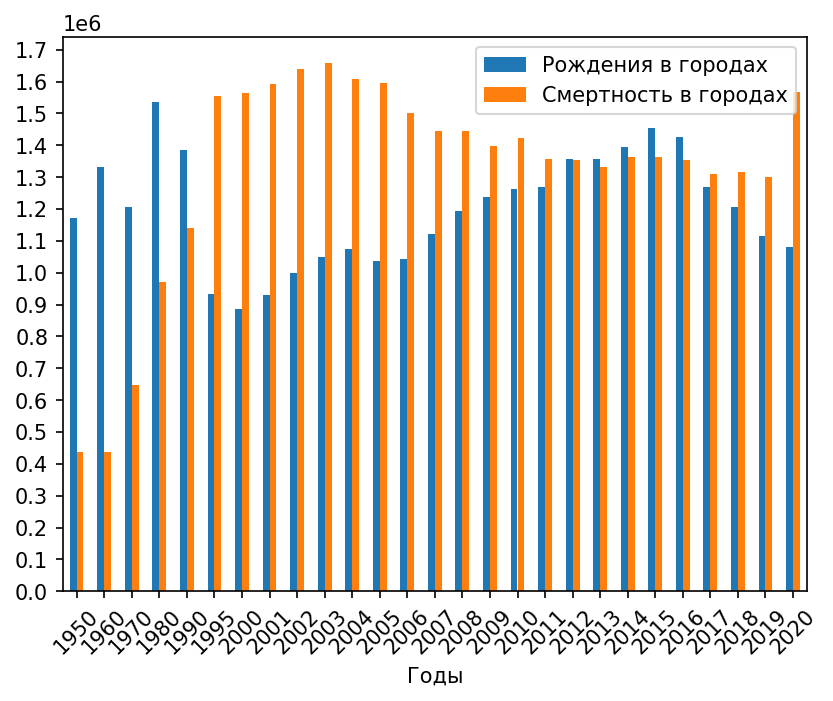

In [33]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

df.plot(kind='bar', x='Годы', y=['Рождения в городах','Смертность в городах'], rot=45)

plt.locator_params(nbins=30)

In [21]:
df.drop(df.tail(1).index,inplace=True) 
df

,Годы,Рождения в городах,Смертность в городах,Естественный прирост среди городского населения,Рождаемость (на 1000 человек),Смертность (на 1000 человек),Естественный прирост (на 1000 человек),Рождения в сельской местности,Смертность в сельской местности,Естественный прирост в сельской местности,Рождаемость (на 1000 человек),Смертность (на 1000 человек),Естественный прирост (на 1000 человек)
0,1950,1171250,436792,734458,26.1,9.7,16.4,1574747,594218,980529,27.5,10.4,17.1
1,1960,1332812,436709,896103,20.4,6.7,13.7,1449541,449831,1000160,26.5,8.2,18.3
2,1970,1205207,646129,559078,14.8,7.9,6.9,698506,485054,213452,14.3,10.0,4.3
3,1980,1535723,970256,565467,15.8,10.0,5.8,667056,555499,111557,16.1,13.4,2.7
4,1990,1386247,1140613,245634,12.7,10.5,2.2,602611,515380,87231,15.5,13.2,2.3
5,1995,933460,1554182,-620722,8.7,14.4,-5.7,430346,649269,-219283,10.9,16.5,-5.6
6,2000,886908,1564034,-677126,8.3,14.6,-6.3,379892,661298,-281406,9.8,17.1,-7.3
7,2001,928642,1592254,-663612,8.7,14.9,-6.2,382962,662602,-279640,10.0,17.3,-7.3
8,2002,998056,1638822,-640766,9.4,15.4,-6.0,398911,693450,-294539,10.5,18.2,-7.7
9,2003,1050565,1657569,-607004,9.9,15.6,-5.7,426736,708257,-281521,11.1,18.4,-7.3


In [22]:
round(df[["Рождения в городах", "Смертность в городах"]].corr(), 2)

,Рождения в городах,Смертность в городах
Рождения в городах,1.00,-0.45
Смертность в городах,-0.45,1.00


In [23]:
df['Рождения в городах'].corr(df['Смертность в городах'])

-0.4498247498256936

In [24]:
from scipy.stats import pearsonr

pearsonr(df['Рождения в городах'], df['Смертность в городах'])

PearsonRResult(statistic=-0.4498247498256936, pvalue=0.018563935158743373)

* Между рождаемостью и смертностью в городах есть значительная отрицательная корреляция

## 2.Как по годам менялись смертность, рождаемость и прирост среди городского и сельского населения (построить демонстрирующие графики, отражающие эту динамику)?

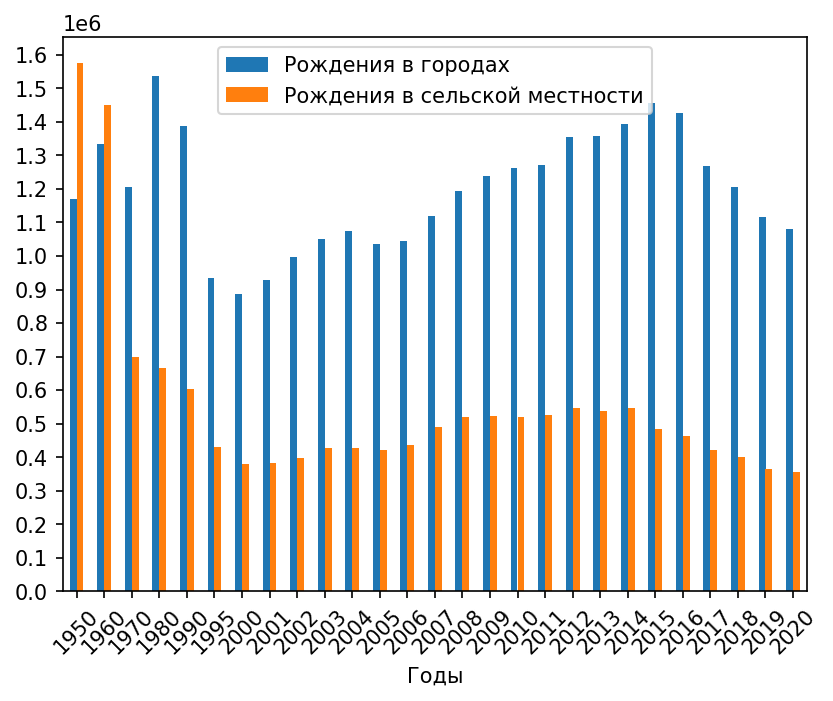

In [34]:
df.plot(kind='bar', x='Годы', y=['Рождения в городах','Рождения в сельской местности'], rot=45)
plt.locator_params(nbins=30)

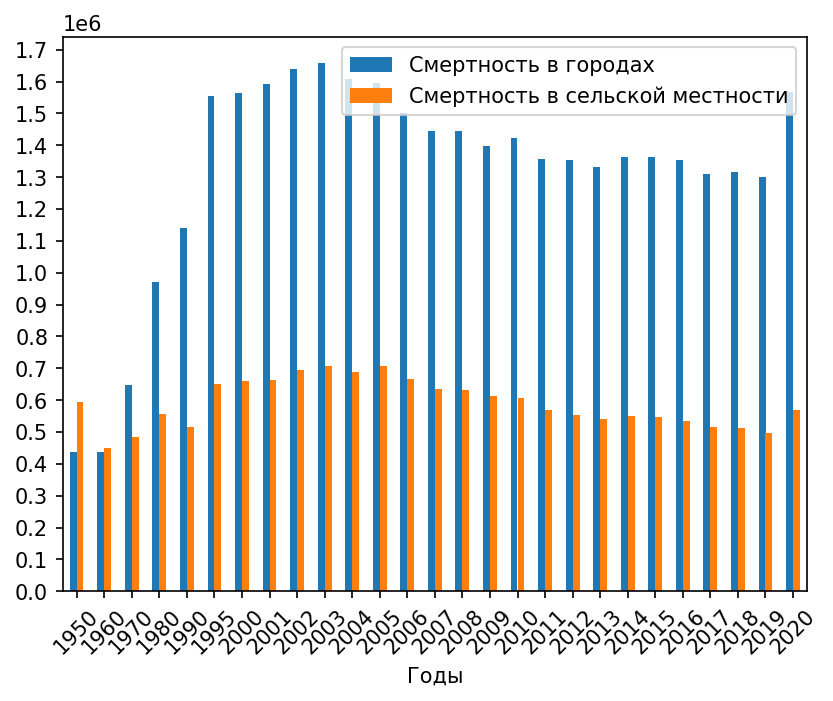

In [35]:
df.plot(kind='bar', x='Годы', y=['Смертность в городах','Смертность в сельской местности'], rot=45)
plt.locator_params(nbins=30)

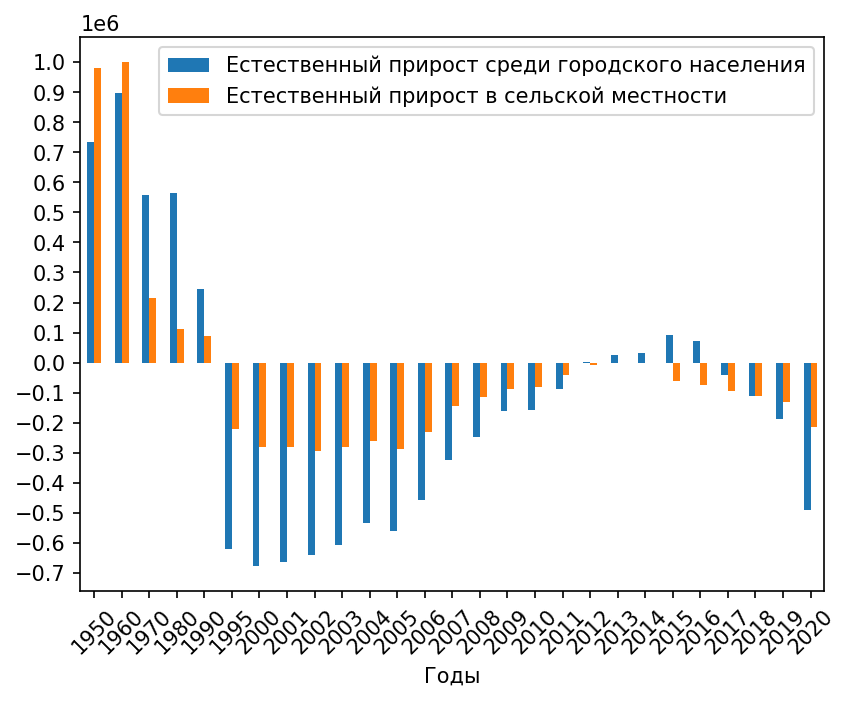

In [36]:
df.plot(kind='bar', x='Годы', y=['Естественный прирост среди городского населения','Естественный прирост в сельской местности'], rot=45)
plt.locator_params(nbins=30)

## 3.Сильно ли влияет смертность на естественный прирост в городах? А в сельской местности?

In [37]:
# https://www.codecamp.ru/blog/pandas-correlation-between-two-columns/?ysclid=lgqwr8luar395678409

df['Смертность в городах'].corr(df['Естественный прирост среди городского населения'])

-0.9355962134783616

In [38]:
from scipy.stats import pearsonr

pearsonr(df['Смертность в городах'], df['Естественный прирост среди городского населения'])

PearsonRResult(statistic=-0.9355962134783619, pvalue=8.353207714927188e-13)

* Смерность в городах имеет очень сильно влияет на естественный прирост среди городского населения

In [39]:
df['Смертность в сельской местности'].corr(df['Естественный прирост в сельской местности'])

-0.5451506287305451

In [40]:
pearsonr(df['Смертность в сельской местности'], df['Естественный прирост в сельской местности'])

PearsonRResult(statistic=-0.5451506287305452, pvalue=0.0032754245332378474)

* Смертность значительно влияет на естественный прирост в сельской местности

## 4.Можно ли выделить группы лет, в которых смертность в городах имела близкие значения? А рождаемость (провести кластеризацию, подобрав подходящий алгоритм для этих данных)? Если да, то с какими событиями это могло быть связано? Может быть, наблюдается какая-то периодичность?

In [64]:
df_clg = df[['Годы', 'Смертность в городах']]
df_clg

,Годы,Смертность в городах
0,1950,436792
1,1960,436709
2,1970,646129
3,1980,970256
4,1990,1140613
5,1995,1554182
6,2000,1564034
7,2001,1592254
8,2002,1638822
9,2003,1657569


(array([1, 2]), [Text(1, 0, 'Годы'), Text(2, 0, 'Смертность в городах')])

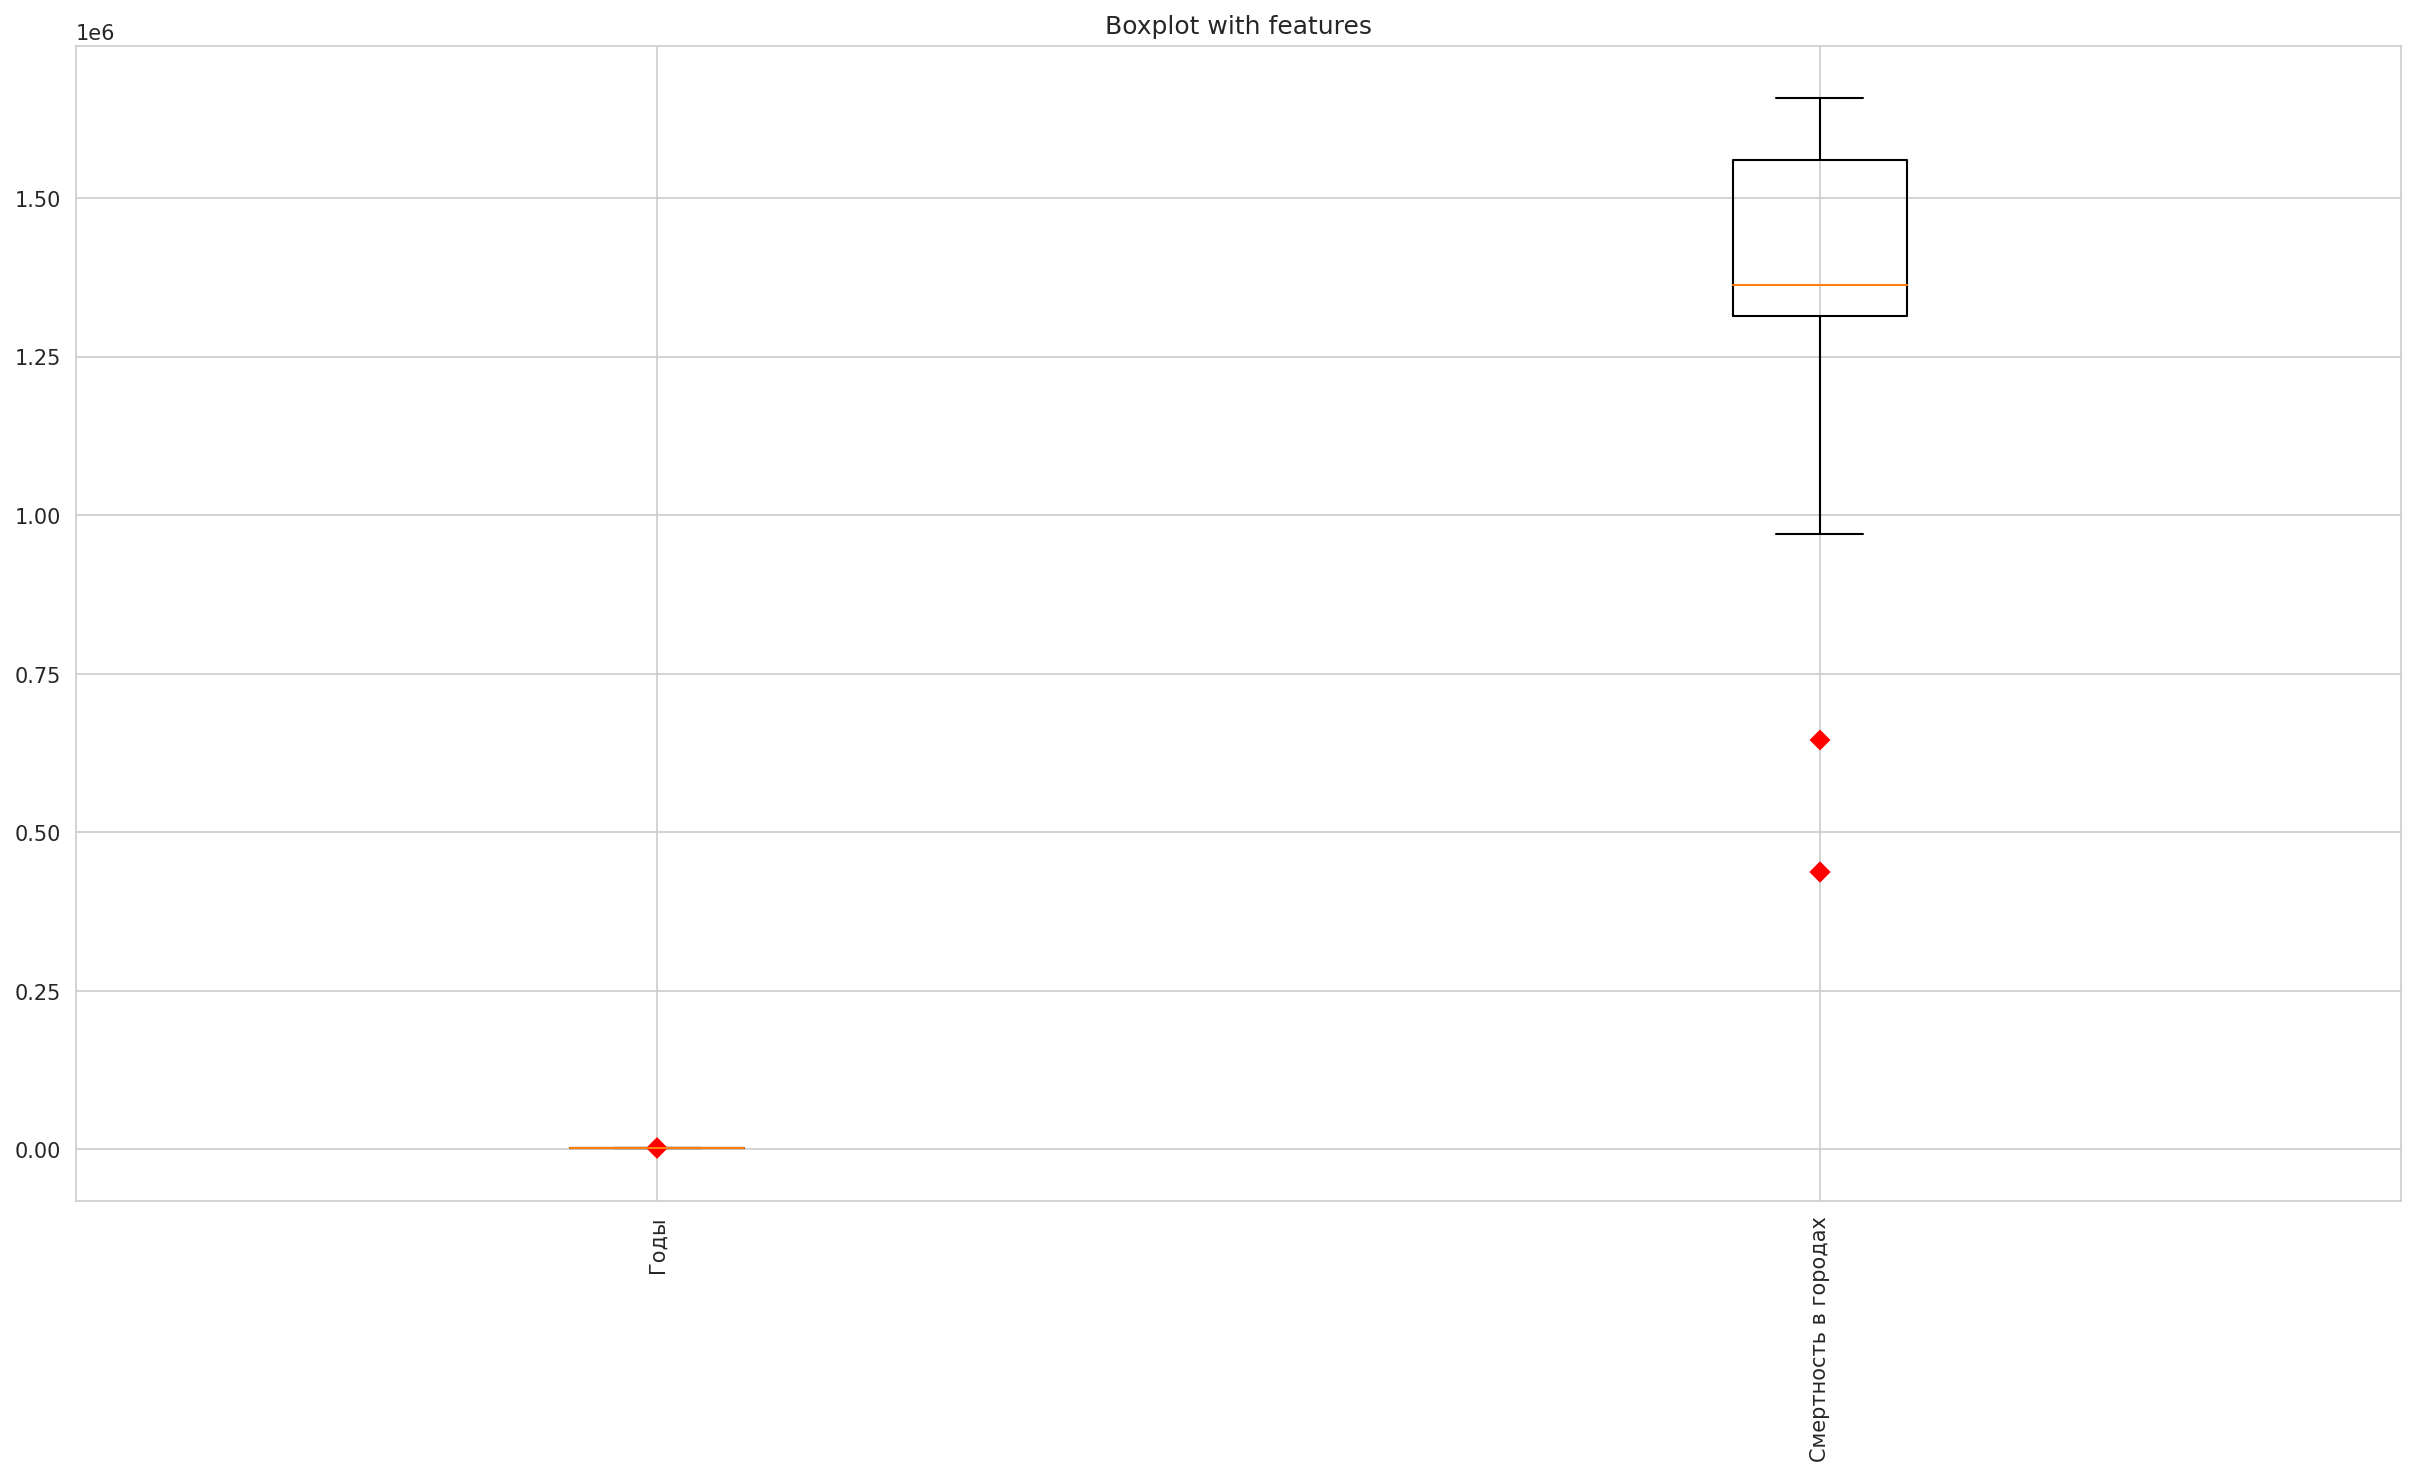

In [65]:
features = list(df_clg.keys())

plt.figure(figsize=(20, 10))
plt.title('Boxplot with features')
plt.boxplot(df_clg.values, 0, 'rD', labels = features)
plt.xticks(rotation = 90)

In [66]:
data_scaled = df_clg

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<Axes: xlabel='num_clusters', ylabel='distortions'>

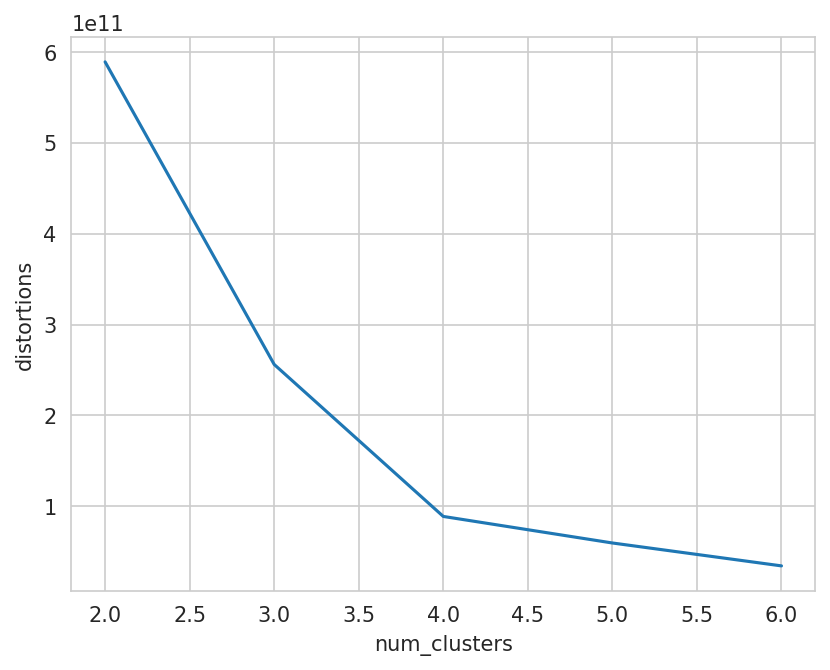

In [68]:
from sklearn.cluster import KMeans
import seaborn as sns

distortions = []
num_clusters = range(2, 7)
for i in num_clusters:
  kmeans = KMeans(n_clusters=i).fit(data_scaled)
  centroids = kmeans.cluster_centers_
  distortion = kmeans.inertia_  # Сумма квадратов расстояний от выборок до центра их ближайшего кластера, взвешенная по весам выборок
  distortions.append(distortion)
elbow_df = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data=elbow_df)

In [69]:
kmeans = KMeans(n_clusters=3).fit(data_scaled)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print("centroids ", centroids)
print("labels ", labels)

centroids  [[   2004.63636364 1560770.45454545]
 [   1960.          506543.33333333]
 [   2009.53846154 1306327.92307692]]
labels  [1 1 1 2 2 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


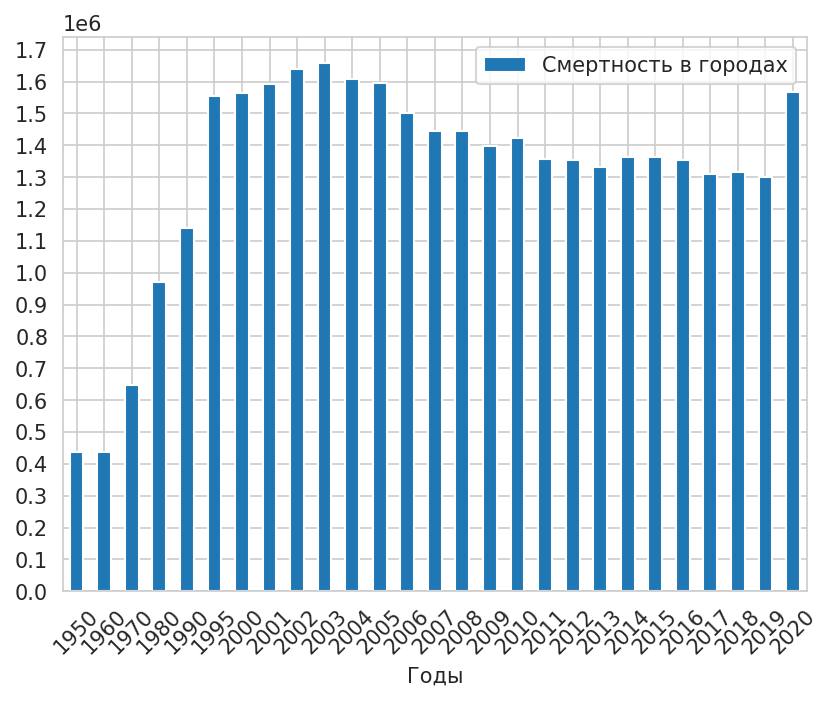

In [91]:
df.plot(kind='bar', x='Годы', y='Смертность в городах', rot=45)
plt.locator_params(nbins=30)

Можно выделить группы лет, в которых смертность в городах имела близкие значения. Нет ярко выраженно периодичности. Увеличение смертности в определенные периоды может быть связано с демографическими волнами и другими факторами. Например увеличение смертности в 2020 году может быть связано с началом пандемии COVID-19. 

In [92]:
df_clg = df[['Годы', 'Рождения в городах']]
df_clg

,Годы,Рождения в городах
0,1950,1171250
1,1960,1332812
2,1970,1205207
3,1980,1535723
4,1990,1386247
5,1995,933460
6,2000,886908
7,2001,928642
8,2002,998056
9,2003,1050565


(array([1, 2]), [Text(1, 0, 'Годы'), Text(2, 0, 'Рождения в городах')])

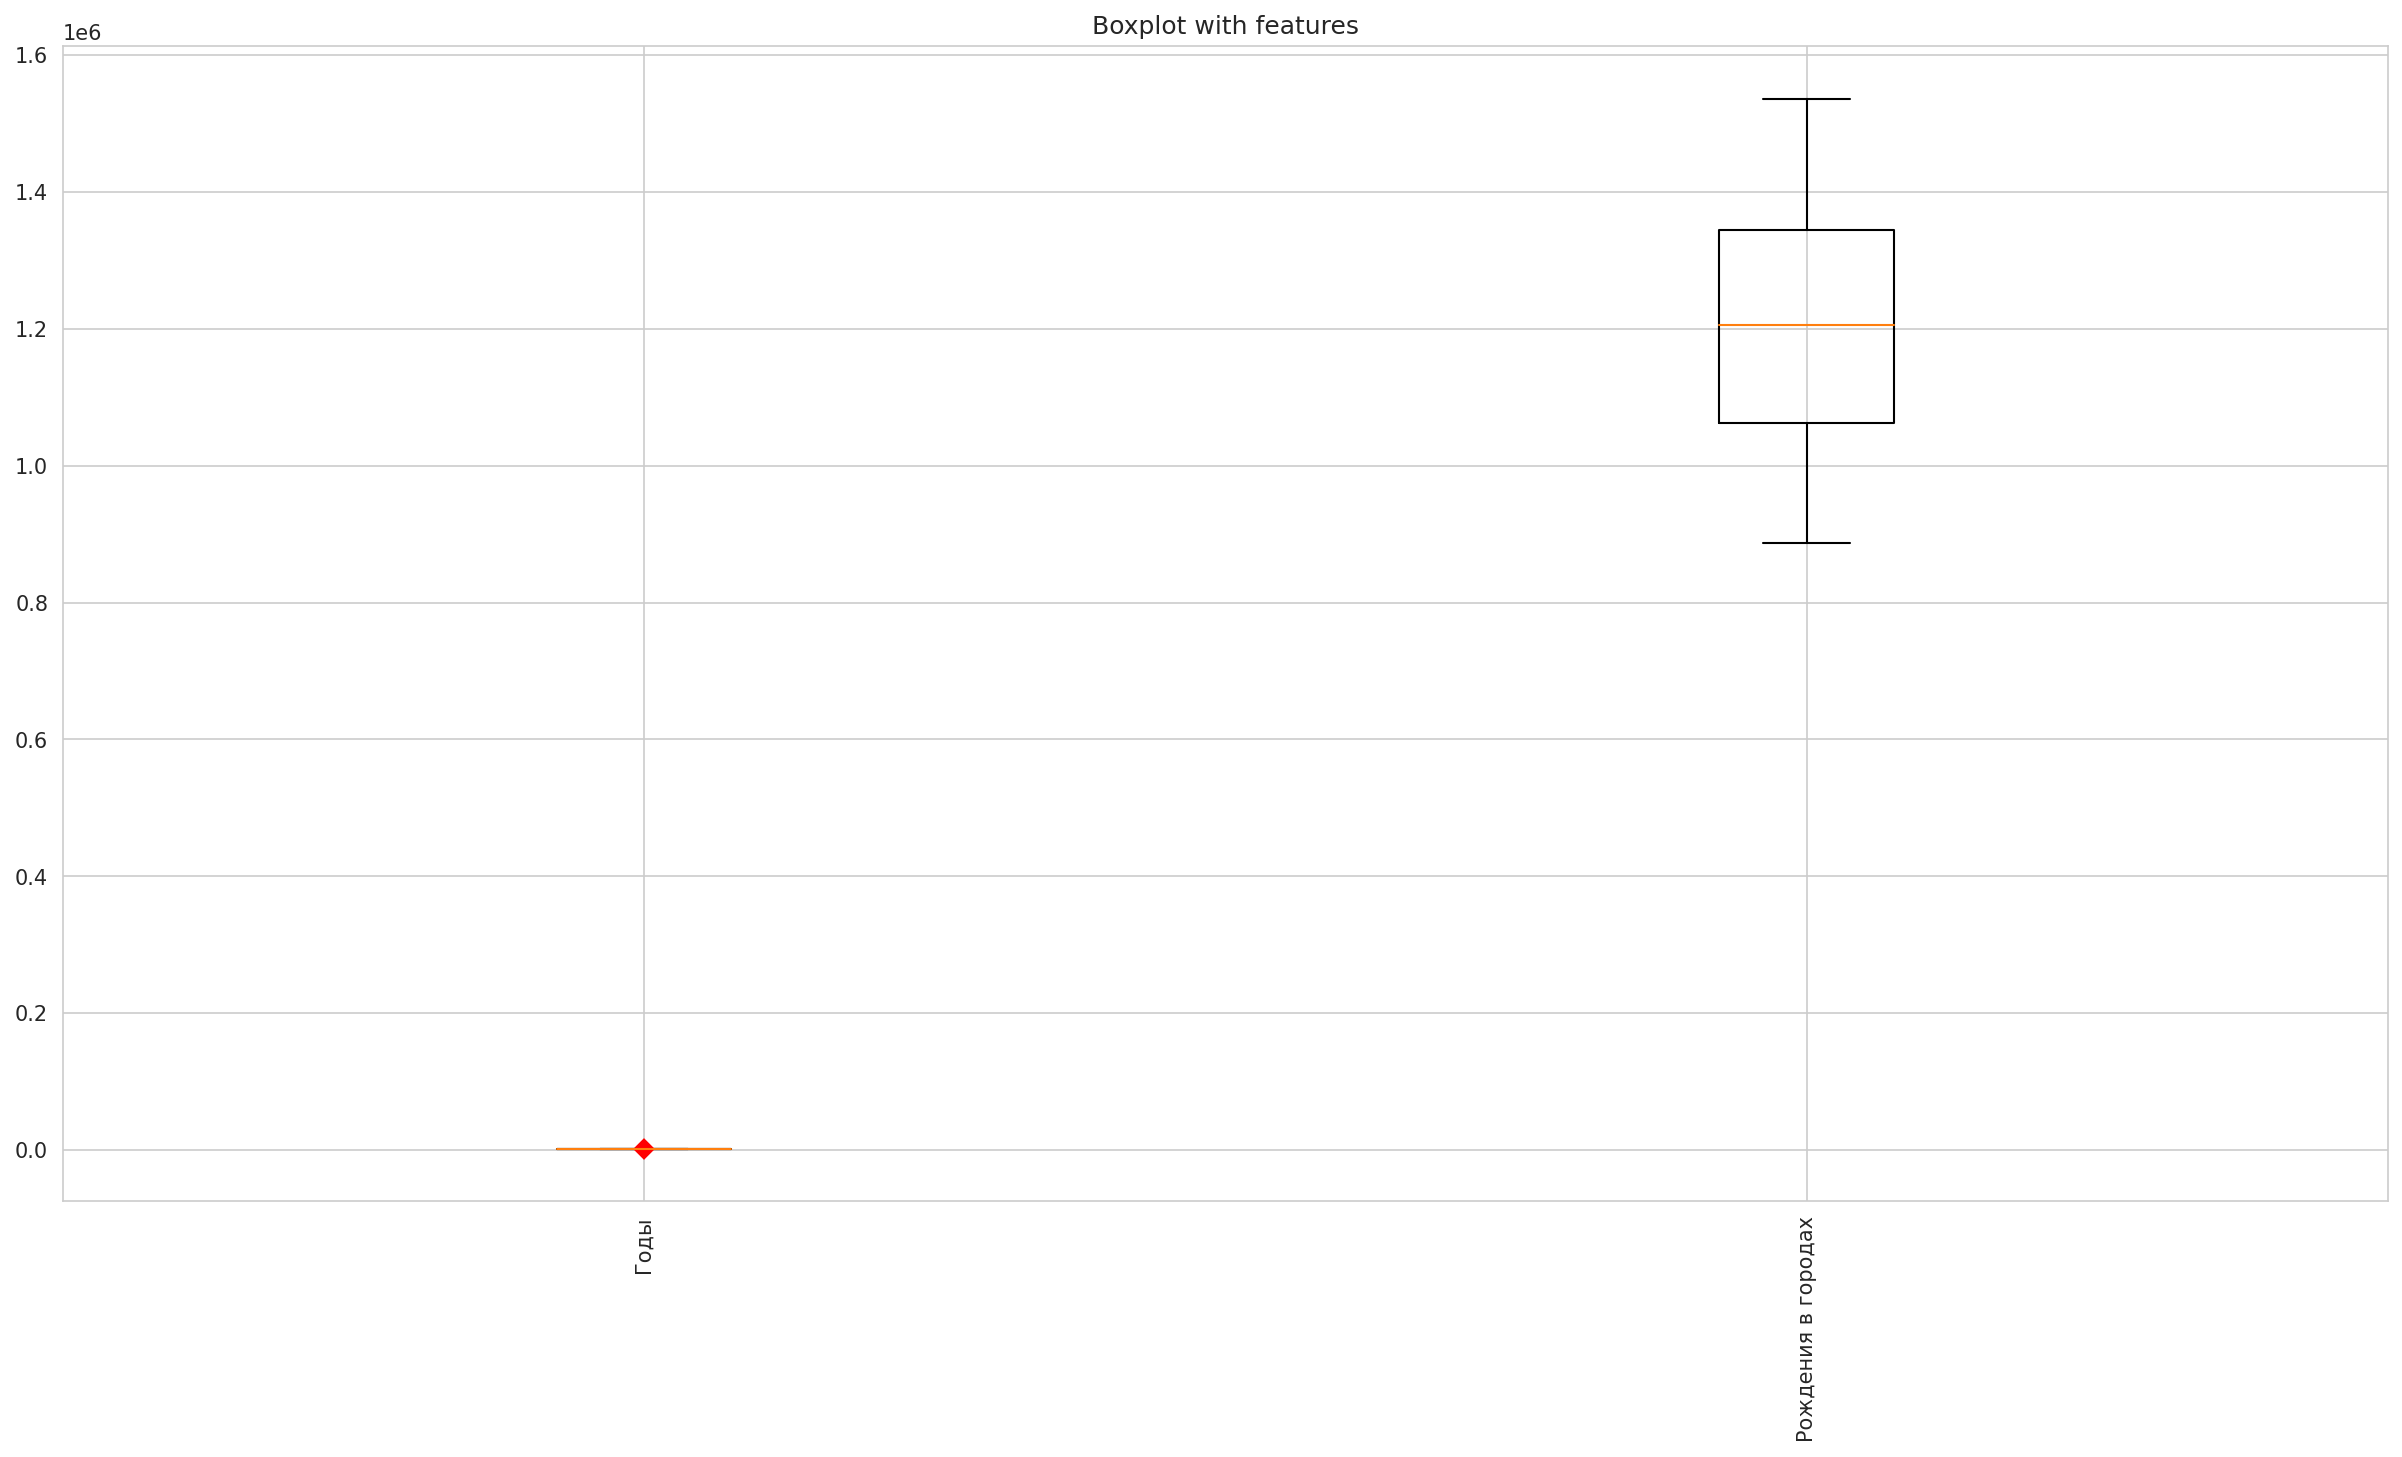

In [93]:
features = list(df_clg.keys())

plt.figure(figsize=(20, 10))
plt.title('Boxplot with features')
plt.boxplot(df_clg.values, 0, 'rD', labels = features)
plt.xticks(rotation = 90)

In [94]:
data_scaled = df_clg

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<Axes: xlabel='num_clusters', ylabel='distortions'>

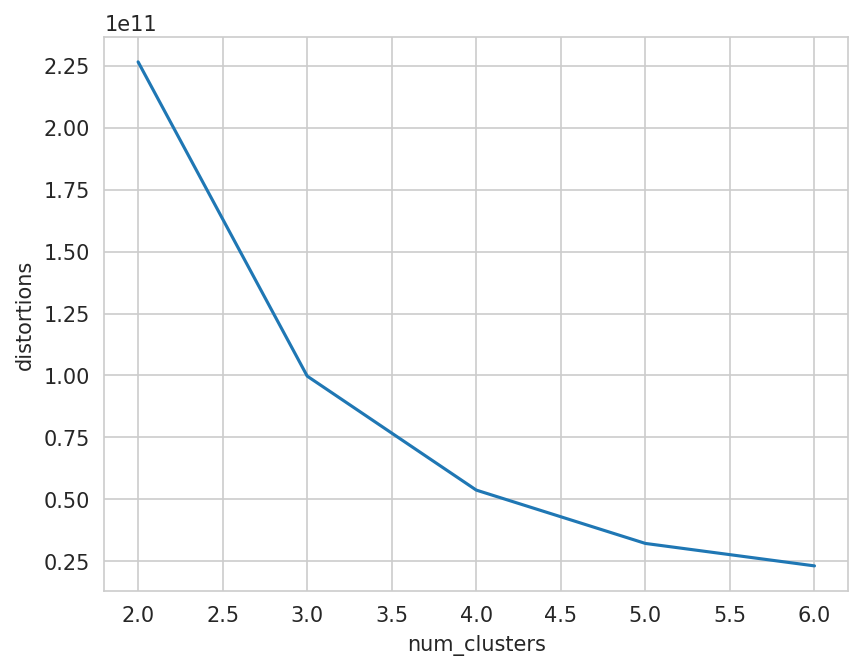

In [95]:
from sklearn.cluster import KMeans
import seaborn as sns

distortions = []
num_clusters = range(2, 7)
for i in num_clusters:
  kmeans = KMeans(n_clusters=i).fit(data_scaled)
  centroids = kmeans.cluster_centers_
  distortion = kmeans.inertia_  # Сумма квадратов расстояний от выборок до центра их ближайшего кластера, взвешенная по весам выборок
  distortions.append(distortion)
elbow_df = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data=elbow_df)

In [96]:
kmeans = KMeans(n_clusters=3).fit(data_scaled)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print("centroids ", centroids)
print("labels ", labels)

centroids  [[   2001.9        1205366.8       ]
 [   2000.         1405562.5       ]
 [   2004.         1003686.11111111]]
labels  [0 1 0 1 1 2 2 2 2 2 2 2 2 0 0 0 0 0 1 1 1 1 1 0 0 0 2]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


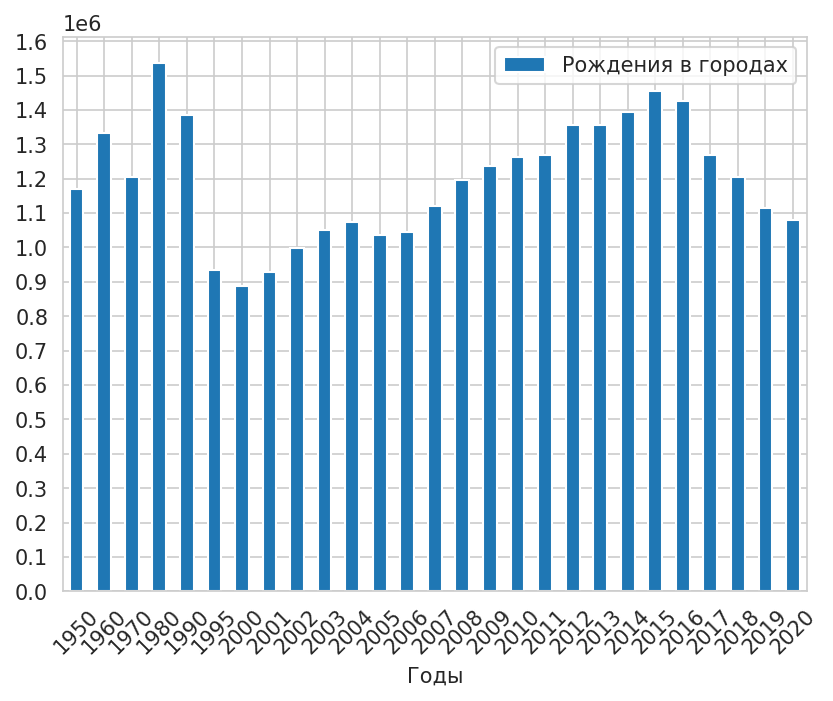

In [97]:
df.plot(kind='bar', x='Годы', y='Рождения в городах', rot=45)
plt.locator_params(nbins=30)

Можно выделить группы лет, в которых рождаемость в городах имела близкие значения. Также на этих значениях заметна периодичность. Периодичность более выражена по сравнению с графиком смертности. В случае с рождаемостью это связано в демографическими волнами и экономической ситуацией в конкретный период времени.